In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
FILEPATH = "/Users/twallacech/Documents/GitHub/rat-city/processed_data/feature_data.csv"
features_df = pd.read_csv(FILEPATH, index_col=0)

In [18]:
features_df.head()

,ZIPCODE,POPULATION,AREA,geometry,RAT COUNT,SCORE,CRITICAL FLAG,ACTION,CUISINE DESCRIPTION_Afghan,CUISINE DESCRIPTION_African,...,CUISINE DESCRIPTION_Vegan,CUISINE DESCRIPTION_Vegetarian,AVG SCORE,AVG FLAGS,Postcode,Sidewalk Dimensions (Area),Roadway Dimensions (Area),Approved for Sidewalk Seating,Approved for Roadway Seating,Qualify Alcohol
0,11213,62426.0,2.963100e+07,POLYGON ((1001613.7129640579 186926.4395172149...,384,810.5,100.5,0.0,0,1,...,0,1,10.952703,1.358108,11213,4751.0,1848.0,14,9,8
1,11212,83866.0,4.197210e+07,"POLYGON ((1011174.275535807 183696.33770971, 1...",165,855.0,99.0,0.0,0,0,...,0,0,10.426829,1.207317,11212,528.0,688.0,6,6,4
2,11225,56527.0,2.369863e+07,POLYGON ((995908.3654508889 183617.61280155182...,364,1054.5,127.5,0.0,0,0,...,0,2,11.461957,1.385870,11225,8963.0,4774.0,32,20,28
3,11218,72280.0,3.686880e+07,"POLYGON ((991997.1134308875 176307.4958601296,...",315,1163.5,141.0,0.0,1,0,...,0,0,11.519802,1.396040,11218,16750.0,5500.0,41,19,22
4,11226,106132.0,3.940860e+07,"POLYGON ((994821.4729396403 177865.7178093046,...",627,1677.0,185.5,0.0,0,2,...,1,4,10.889610,1.204545,11226,9653.0,3624.0,38,25,19


<AxesSubplot:>

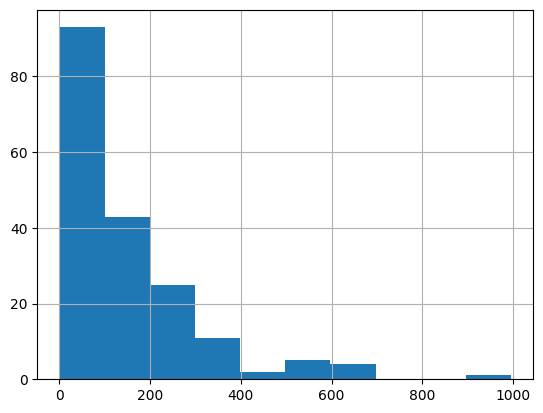

In [19]:
features_df["RAT COUNT"].hist()

<AxesSubplot:>

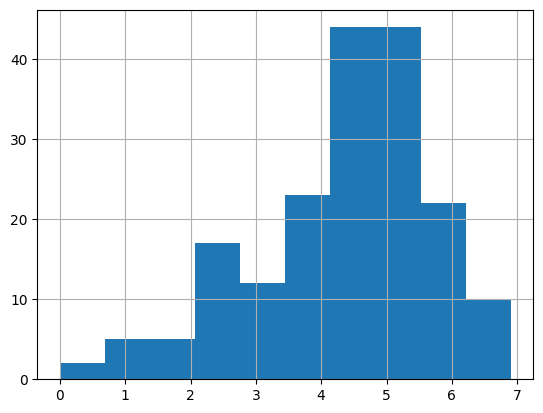

In [20]:
# Transform the rat count to be closer to gaussian
(np.log(features_df["RAT COUNT"])).hist()

<AxesSubplot:>

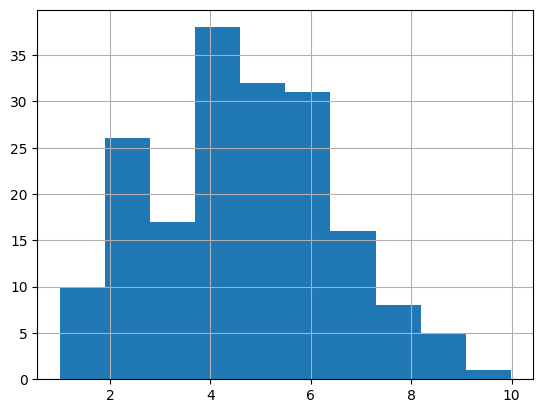

In [21]:
(features_df["RAT COUNT"] ** (1/3)).hist()

<AxesSubplot:>

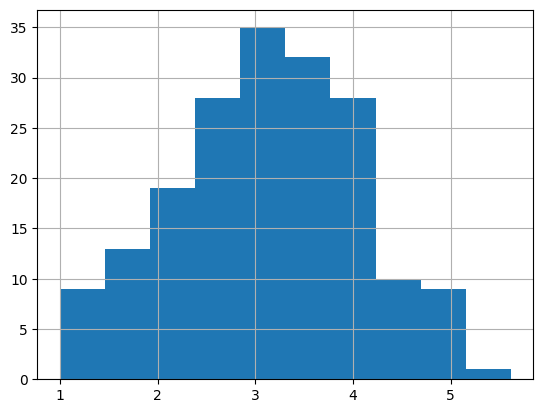

In [22]:
(features_df["RAT COUNT"] ** (1/4)).hist()

<AxesSubplot:>

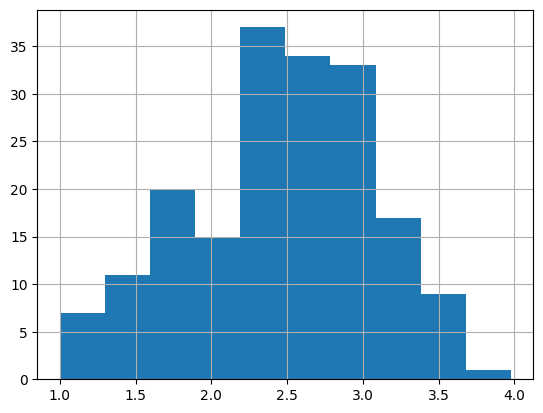

In [23]:
(features_df["RAT COUNT"] ** (1/5)).hist()

<AxesSubplot:>

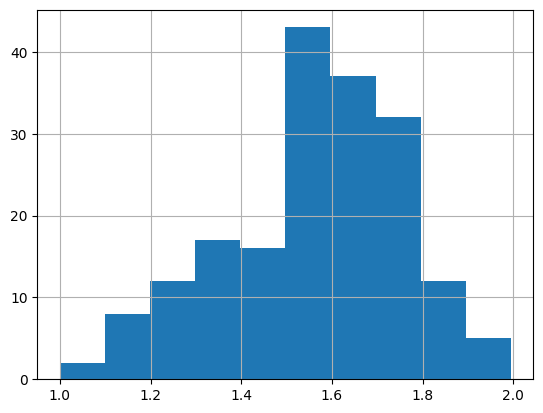

In [24]:
(features_df["RAT COUNT"] ** (1/10)).hist()

In [25]:
# Let's look at outliers
import plotly.express as px

In [26]:
px.box(
    features_df,
    'Roadway Dimensions (Area)'
)

In [27]:
features_df["RAT COUNT - Transformed"] = features_df["RAT COUNT"] ** (1/4)

In [28]:
import seaborn as sns

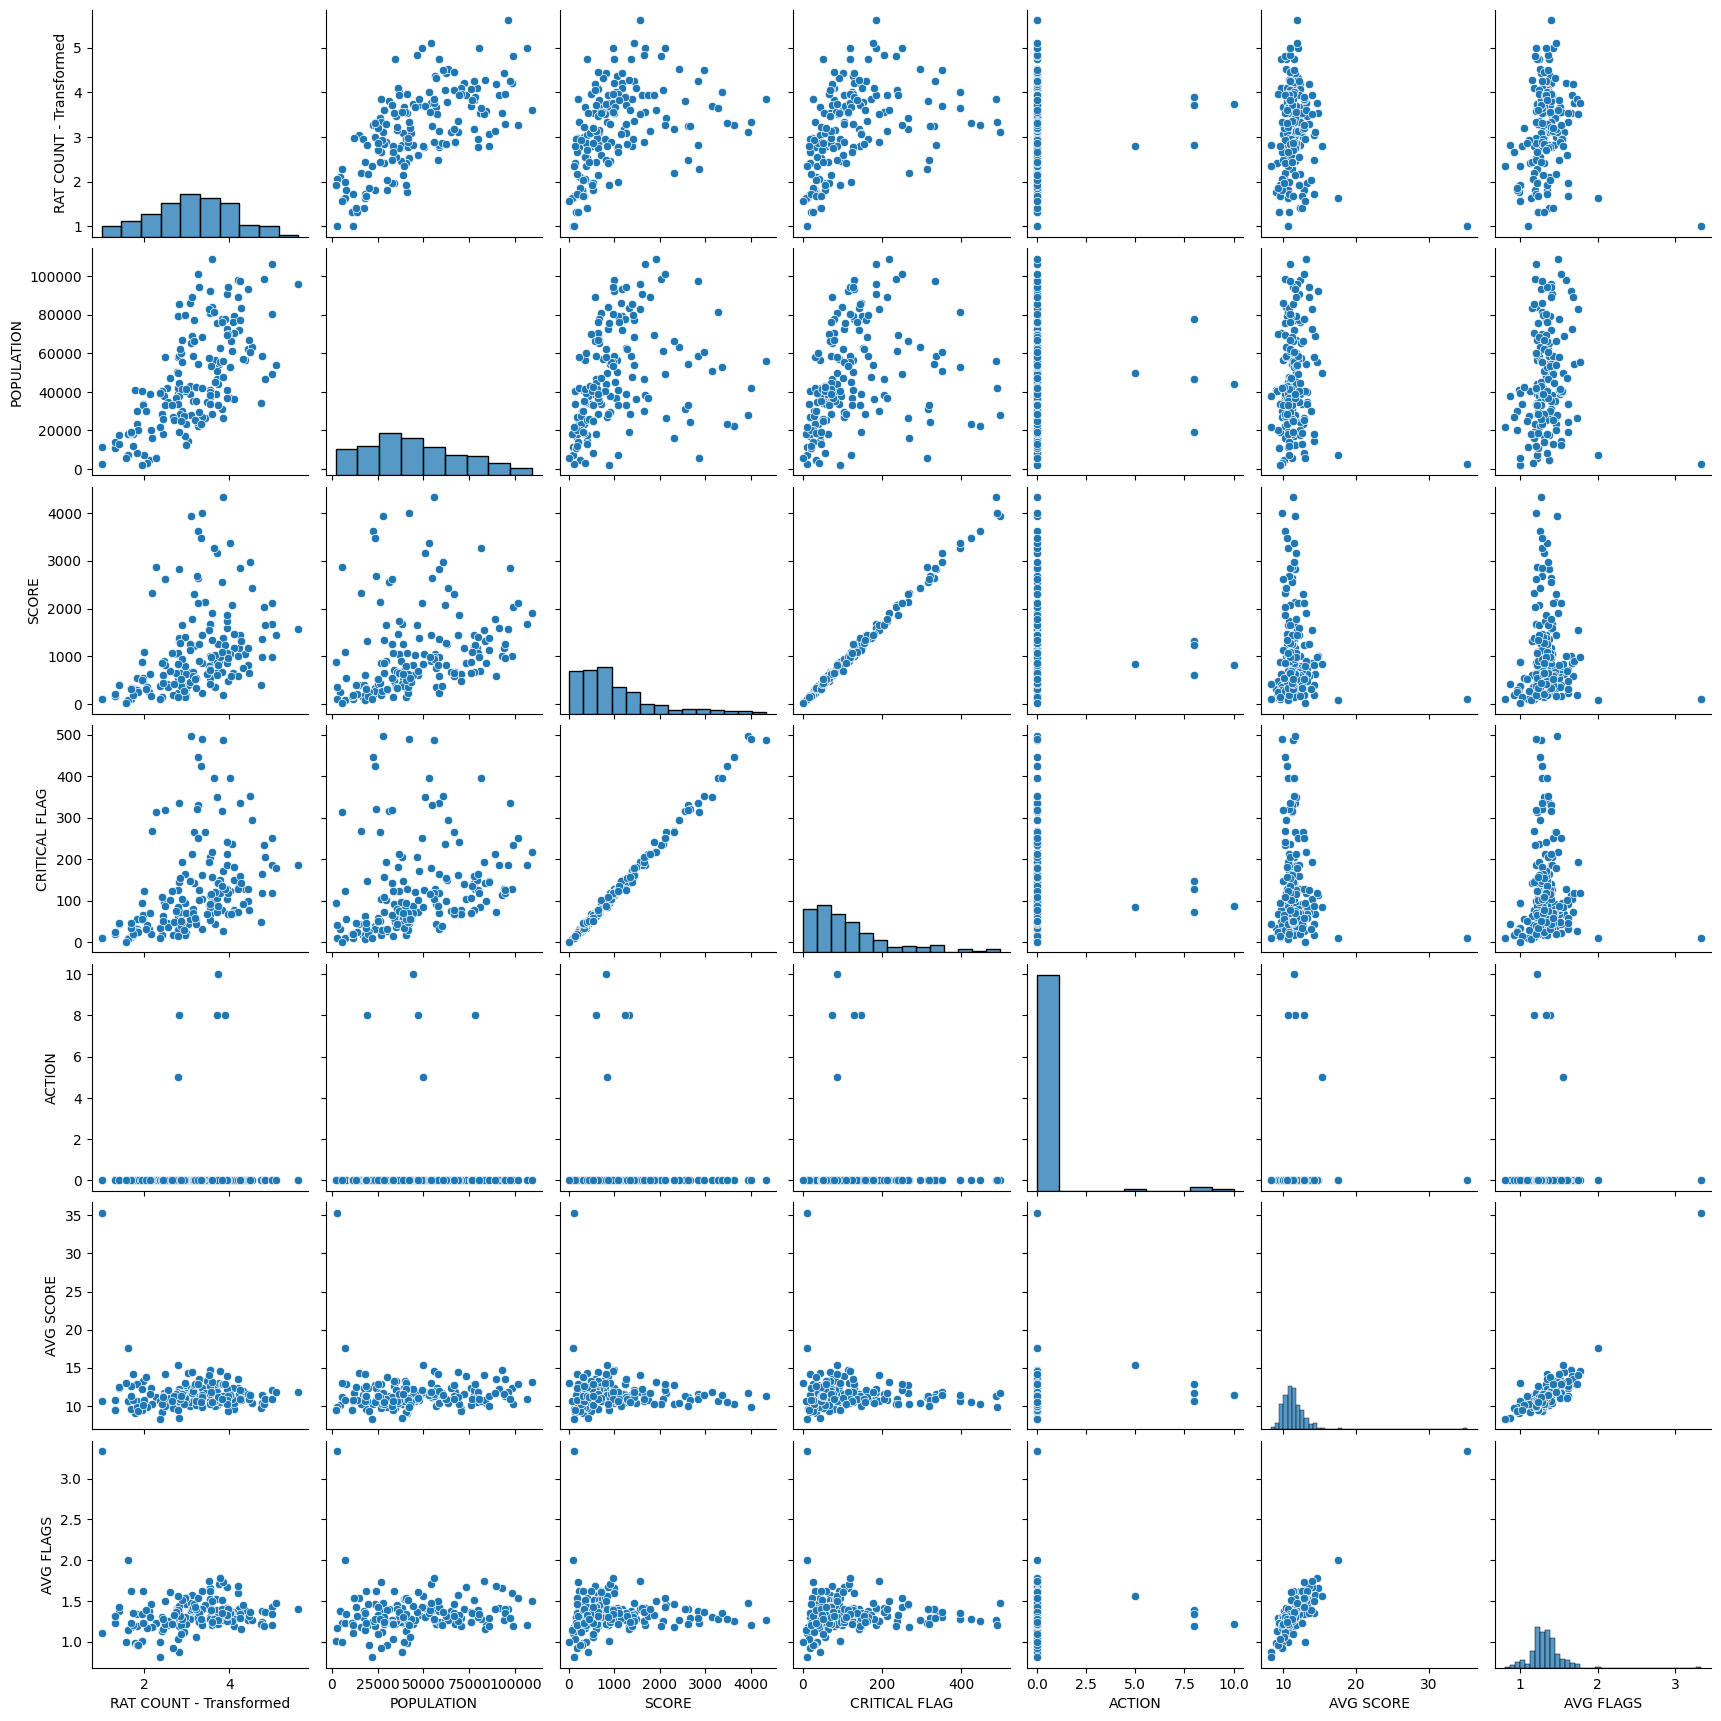

In [29]:
sns.pairplot(features_df[[
    "RAT COUNT - Transformed",
    "POPULATION",
    "SCORE",
    "CRITICAL FLAG",
    "ACTION",
    "AVG SCORE",
    "AVG FLAGS"
]])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


linreg = LinearRegression()

x_features = [
    "POPULATION",
    "SCORE",
    "CRITICAL FLAG",
    "ACTION",
    "AVG SCORE",
    "AVG FLAGS"
]

y_feature = ["RAT COUNT - Transformed"]

test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(
    features_df[x_features],
    features_df[y_feature],
    test_size=test_size,
    random_state=42
)

linreg.fit(x_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = linreg.predict(x_test)
y_pred = y_pred ** 4

print(mean_absolute_percentage_error(y_test ** 4, y_pred))

1.7701843014724592


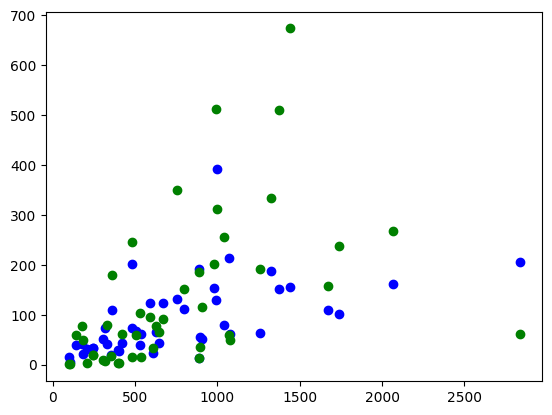

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_test.iloc[:, 1], y_pred, color='b')
plt.scatter(x_test.iloc[:, 1], y_test ** 4, color='g')
plt.show()

#### Linear Regression and 

In [33]:
import numpy as np                      # pip install numpy
import pandas as pd                     # pip install pandas
import matplotlib.pyplot as plt         # pip install matplotlib
import streamlit as st                  # pip install streamlit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import random
import plotly.express as px

In [34]:
def train_multiple_regression(X_train, y_train, regression_methods_options):
    """
    Fit a multiple regression model to data 

    Input: 
        - X_train: training features
        - y_train: training targets
        - regression_methods_options: a list of all possible model names
    Output: 
        - multi_reg_model: the trained multiple regression model
    """
    try:
        multi_reg_model = LinearRegression()
        multi_reg_model.fit(X_train, y_train)
  
    except Exception as e:
        st.write(f"An error occurred while training the Linear Regression model: {str(e)}")
    
     # Store model in st.session_state[model_name]
    st.session_state['Multiple Linear Regression'] = multi_reg_model

    return multi_reg_model

In [35]:
def train_polynomial_regression(X_train, y_train, regression_methods_options, poly_degree, poly_include_bias):
    """
    This function trains the model with polynomial regression

    Input: 
        - X_train: training features
        - y_train: training targets
        - regression_methods_options: a list of all possible model names
        - poly_degree: the degree of polynomial
        - poly_include_bias: whether or not to include bias
    Output: 
        - poly_reg_model: the trained model
    """
    poly_reg_model = None

    # Train model. Handle errors with try/except statement
    try:
        poly_reg_model = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=poly_degree, include_bias=poly_include_bias)), ('polyReg', LinearRegression())])
        poly_reg_model = poly_reg_model.fit(X_train, y_train)

    except Exception as e:
        st.write(f"An error occurred while training the Polynomial Regression model: {str(e)}")

    # Store model in st.session_state[model_name]
    st.session_state['Polynomial Regression'] = poly_reg_model

    return poly_reg_model

In [36]:
def train_ridge_regression(X_train, y_train, regression_methods_options, ridge_params, ridge_cv_fold):
    """
    This function trains the model with ridge regression and cross-validation

    Input: 
        - X_train: training features
        - y_train: training targets
        - regression_methods_options: a list of all possible model names
        - ridge_params: a dictionary of the hyperparameters to tune during cross validation
        - ridge_cv_fold: the number of folds for cross validation
    Output: 
        - ridge_cv: the trained model
    """
    # Train model. Handle errors with try/except statement
    ridge_cv = None

    try:
        ridge_cv = Pipeline([('scaler', StandardScaler()), ('ridgeCV', GridSearchCV(estimator=Ridge(), param_grid=ridge_params, cv=ridge_cv_fold))])
        ridge_cv.fit(X_train, y_train)

    except Exception as e:
        st.write(f"An error occurred while training the Ridge Regression model: {str(e)}")

    # Store model in st.session_state[model_name]
    st.session_state["Ridge Regression"] = ridge_cv
    return ridge_cv

In [37]:
def train_lasso_regression(X_train, y_train, regression_methods_options, lasso_params, lasso_cv_fold):
    """
    This function trains the model with lasso regression and cross-validation

    Input: 
        - X_train: training features
        - y_train: training targets
        - regression_methods_options: a list of all possible model names
        - lasso_params: a dictionary of the hyperparameters to tune during cross validation
        - lasso_cv_fold: the number of folds for cross validation
    Output: 
        - lasso_cv: the trained model
    """
    lasso_cv = None
    try:
        lasso_cv = Pipeline([('scaler', StandardScaler()), ('lassoCV', GridSearchCV(estimator=Lasso(), param_grid=lasso_params, cv=lasso_cv_fold))])
        lasso_cv.fit(X_train, y_train)
    
    except Exception as e:
        st.write(f"An error occurred while training the Lasso Regression model: {str(e)}")

    # Store model in st.session_state[model_name]
    st.session_state["Lasso Regression"] = lasso_cv
    return lasso_cv

In [38]:
st.session_state['target'] = 'RAT COUNT'

regression_methods_options = ['Multiple Linear Regression',
                                'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
# Collect ML Models of interests
regression_model_select = st.multiselect(
    label='Select regression model for prediction',
    options=regression_methods_options,
)
st.write('You selected the follow models: {}'.format(
    regression_model_select))

###################### TRAIN REGRESSION MODELS #######################
# # Add parameter options to each regression method

# Multiple Linear Regression
if (regression_methods_options[0] in regression_model_select):
    st.markdown('#### ' + regression_methods_options[0])
    if st.button('Train Multiple Linear Regression Model'):
        train_multiple_regression(
            x_train, y_train, regression_methods_options)

    if regression_methods_options[0] not in st.session_state:
        st.write('Multiple Linear Regression Model is untrained')
    else:
        st.write('Multiple Linear Regression Model trained')

# Polynomial Regression
if (regression_methods_options[1] in regression_model_select):
    st.markdown('#### ' + regression_methods_options[1])

    poly_degree = st.number_input(
        label='Enter the degree of polynomial',
        min_value=0,
        max_value=10,
        value=3,
        step=1,
        key='poly_degree_numberinput'
    )
    st.write('You set the polynomial degree to: {}'.format(poly_degree))

    poly_include_bias = st.checkbox('include bias')
    st.write('You set include_bias to: {}'.format(poly_include_bias))

    if st.button('Train Polynomial Regression Model'):
        train_polynomial_regression(
            x_train, y_train, regression_methods_options, poly_degree, poly_include_bias)

    if regression_methods_options[1] not in st.session_state:
        st.write('Polynomial Regression Model is untrained')
    else:
        st.write('Polynomial Regression Model trained')

# Ridge Regression
if (regression_methods_options[2] in regression_model_select):
    st.markdown('#### ' + regression_methods_options[2])
    ridge_cv_fold = st.number_input(
        label='Enter the number of folds of the cross validation',
        min_value=1,
        max_value=10,
        value=3,
        step=1,
        key='ridge_cv_fold_numberinput'
    )
    st.write('You set the number of folds to: {}'.format(ridge_cv_fold))

    solvers = ['auto', 'svd', 'cholesky', 'lsqr',
                'sparse_cg', 'sag', 'saga', 'lbfgs']
    ridge_solvers = st.multiselect(
        label='Select solvers for ridge regression',
        options=solvers,
        default=solvers[0],
        key='ridge_reg_solver_multiselect'
    )
    st.write('You select the following solver(s): {}'.format(ridge_solvers))

    ridge_alphas = st.text_input(
        label='Input a list of alpha values, separated by comma',
        value='1.0,0.5',
        key='ridge_alphas_textinput'
    )
    st.write('You select the following alpha value(s): {}'.format(ridge_alphas))

    ridge_params = {
        'solver': ridge_solvers,
        'alpha': [float(val) for val in ridge_alphas.split(',')]
    }

    if st.button('Train Ridge Regression Model'):
        train_ridge_regression(
            x_train, y_train, regression_methods_options, ridge_params, ridge_cv_fold)

    if regression_methods_options[2] not in st.session_state:
        st.write('Ridge Model is untrained')
    else:
        st.write('Ridge Model trained')

# Lasso Regression
if (regression_methods_options[3] in regression_model_select):
    st.markdown('#### ' + regression_methods_options[3])
    lasso_cv_fold = st.number_input(
        label='Enter the number of folds of the cross validation',
        min_value=1,
        max_value=10,
        value=3,
        step=1,
        key='lasso_cv_fold_numberinput'
    )
    st.write('You set the number of folds to: {}'.format(lasso_cv_fold))

    lasso_tol = st.text_input(
        label='Input a list of tolerance values, separated by comma',
        value='0.001,0.0001',
        key='lasso_tol_textinput'
    )
    st.write('You select the following tolerance value(s): {}'.format(lasso_tol))

    lasso_alphas = st.text_input(
        label='Input a list of alpha values, separated by comma',
        value='1.0,0.5',
        key='lasso_alphas_textinput'
    )
    st.write('You select the following alpha value(s): {}'.format(lasso_alphas))

    lasso_params = {
        'tol': [float(val) for val in lasso_tol.split(',')],
        'alpha': [float(val) for val in lasso_alphas.split(',')]
    }

    if st.button('Train Lasso Regression Model'):
        train_lasso_regression(
            x_train, y_train, regression_methods_options, lasso_params, lasso_cv_fold)

    if regression_methods_options[3] not in st.session_state:
        st.write('Lasso Model is untrained')
    else:
        st.write('Lasso Model trained')

2023-05-10 22:54:53.386 
  command:

    streamlit run /usr/local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-05-10 22:54:53.387 Session state does not function when running a script without `streamlit run`


#### TEST MODELS

In [ ]:
import numpy as np                      # pip install numpy
import pandas as pd                     # pip install pandas
import matplotlib.pyplot as plt        # pip install matplotlib
import streamlit as st                  # pip install streamlit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
random.seed(10)
#############################################

st.markdown("### Final Project - Predicting number of rat complaints based on number of restaurants in an area and the average health inspection grade in the area, using Regression")

#############################################

st.title('Test Model')

#############################################

def mae(y_true, y_pred):
    """
    Measures the absolute difference between predicted and actual values

    Input:
        - y_true: true targets
        - y_pred: predicted targets
    Output:
        - mean absolute error
    """
    mae_score = -1
    mae_score = mean_absolute_error(y_true, y_pred)
    return mae_score

def rmse(y_true, y_pred):
    """
    This function computes the root mean squared error. 
    Measures the difference between predicted and 
    actual values using Euclidean distance.

    Input:
        - y_true: true targets
        - y_pred: predicted targets
    Output:
        - root mean squared error
    """
    rmse_score = -1
    rmse_score = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse_score

def r2(y_true, y_pred):
    """
    Compute Coefficient of determination (R2 score). 
    Represents proportion of variance in predicted values 
    that can be explained by the input features.

    Input:
        - y_true: true targets
        - y_pred: predicted targets
    Output:
        - r2 score
    """
    r2_score_res = r2_score(y_true, y_pred)
    return r2_score_res

# Used to access model performance in dictionaries
METRICS_MAP = {
    'mean_absolute_error': mae,
    'root_mean_squared_error': rmse,
    'r2_score': r2
}

# Checkpoint 9
def compute_eval_metrics(X, y_true, model, metrics):
    """
    This function checks the metrics of the models

    Input:
        - X: pandas dataframe with training features
        - y_true: pandas dataframe with true targets
        - model: the model to evaluate
        - metrics: the metrics to evaluate performance 
    Output:
        - metric_dict: a dictionary contains the computed metrics of the selected model, with the following structure:
            - {metric1: value1, metric2: value2, ...}
    """
    metric_dict = {}

    y_pred = model.predict(X)

    for metric in metrics:
        if metric == 'mean_absolute_error':
            metric_value = mae(y_true, y_pred)
        elif metric == 'root_mean_squared_error':
            metric_value = rmse(y_true, y_pred)
        elif metric == 'r2_score':
            metric_value = r2(y_true, y_pred)
        else:
            raise ValueError(f"Unknown metric: {metric}")
        
        metric_dict[metric] = metric_value

    return metric_dict

# Checkpoint 10
def plot_learning_curve(X_train, X_val, y_train, y_val, trained_model, metrics, model_name):
    """
    This function plots the learning curve. Note that the learning curve is calculated using 
    increasing sizes of the training samples
    Input:
        - X_train: training features
        - X_val: validation/test features
        - y_train: training targets
        - y_val: validation/test targets
        - trained_model: the trained model to be calculated learning curve on
        - metrics: a list of metrics to be computed
        - model_name: the name of the model being checked
    Output:
        - fig: the plotted figure
        - df: a dataframe containing the train and validation errors, with the following keys:
            - df[metric_fn.__name__ + " Training Set"] = train_errors
            - df[metric_fn.__name__ + " Validation Set"] = val_errors
    """

    fig = make_subplots(rows=len(metrics), cols=1, subplot_titles=[metric for metric in metrics])
    df = pd.DataFrame()

    for metric in metrics:
        train_errors = []
        val_errors = []

        for m in range(500, len(X_train) + 1, 500):
            trained_model.fit(X_train[:m], y_train[:m])
            y_train_pred = trained_model.predict(X_train[:m])
            y_val_pred = trained_model.predict(X_val)
            train_error = METRICS_MAP[metric](y_train[:m], y_train_pred)
            val_error = METRICS_MAP[metric](y_val, y_val_pred)
            train_errors.append(train_error)
            val_errors.append(val_error)

        metric_name = METRICS_MAP[metric].__name__
        df[f"{metric_name} Training Set"] = train_errors
        df[f"{metric_name} Validation Set"] = val_errors

        metric_idx = metrics.index(metric) + 1
        fig.add_trace(go.Scatter(x=list(range(500, len(X_train) + 1, 500)), y=train_errors, mode='lines+markers', name=f"{metric_name} Training Set"), row=metric_idx, col=1)
        fig.add_trace(go.Scatter(x=list(range(500, len(X_train) + 1, 500)), y=val_errors, mode='lines+markers', name=f"{metric_name} Validation Set"), row=metric_idx, col=1)

    fig.update_layout(title=f"{model_name} Learning Curves", showlegend=True)
    st.plotly_chart(fig)


    return fig, df


# Helper function
def restore_data(df):
    """
    This function restores the training and validation/test datasets from the training page using st.session_state
                Note: if the datasets do not exist, re-split using the input df

    Input: 
        - df: the pandas dataframe
    Output: 
        - X_train: the training features
        - X_val: the validation/test features
        - y_train: the training targets
        - y_val: the validation/test targets
    """
    X_train = None
    y_train = None
    X_val = None
    y_val = None
    # Restore train/test dataset
    if ('X_train' in st.session_state):
        X_train = st.session_state['X_train']
        y_train = st.session_state['y_train']
        st.write('Restored train data ...')
    if ('X_val' in st.session_state):
        X_val = st.session_state['X_val']
        y_val = st.session_state['y_val']
        st.write('Restored test data ...')
    if (X_train is None):
        # Select variable to explore
        numeric_columns = list(df.select_dtypes(include='number').columns)
        feature_select = st.selectbox(
            label='Select variable to predict',
            options=numeric_columns,
        )
        X = df.loc[:, ~df.columns.isin([feature_select])]
        Y = df.loc[:, df.columns.isin([feature_select])]

        # Split train/test
        st.markdown(
            '### Enter the percentage of test data to use for training the model')
        number = st.number_input(
            label='Enter size of test set (X%)', min_value=0, max_value=100, value=30, step=1)

        X_train, X_val, y_train, y_val = split_dataset(X, Y, number)
        st.write('Restored training and test data ...')
    return X_train, X_val, y_train, y_val

# Helper function
@st.cache
def convert_df(df):
    """
    Cache the conversion to prevent computation on every rerun

    Input: 
        - df: pandas dataframe
    Output: 
        - Save file to local file system
    """
    return df.to_csv().encode('utf-8')

###################### FETCH DATASET #######################
df = None
# df = ... Add code here: read in data and store in st.session_state
def restore_dataset():
    if 'data' not in st.session_state:
        data = st.file_uploader('Upload a Dataset', type=['csv', 'txt'])
        if data:
            df = pd.read_csv(data)
            st.session_state['data'] = df
        else:
            return None
    else:
        df = st.session_state['data']
    return df

df = restore_dataset()



if df is not None:
    # Restore dataset splits
    X_train, X_val, y_train, y_val = restore_data(df)

    st.markdown("## Get Performance Metrics")
    metric_options = ['mean_absolute_error',
                      'root_mean_squared_error', 'r2_score']
    
    # Select multiple metrics for evaluation
    metric_select = st.multiselect(
        label='Select metrics for regression model evaluation',
        options=metric_options,
    )
    if (metric_select):
        st.session_state['metric_select'] = metric_select
        st.write('You selected the following metrics: {}'.format(metric_select))

    regression_methods_options = ['Multiple Linear Regression',
                                  'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
    trained_models = [
        model for model in regression_methods_options if model in st.session_state]
    st.session_state['trained_models'] = trained_models

    # Select a trained regression model for evaluation
    model_select = st.multiselect(
        label='Select trained regression models for evaluation',
        options=trained_models
    )
    if (model_select):
        st.write(
            'You selected the following models for evaluation: {}'.format(model_select))

        eval_button = st.button('Evaluate your selected regression models')

        if eval_button:
            st.session_state['eval_button_clicked'] = eval_button

        if 'eval_button_clicked' in st.session_state and st.session_state['eval_button_clicked']:
            st.markdown('## Review Regression Model Performance')

            review_model_select = st.multiselect(
                label='Select models to review',
                options=model_select
            )

            plot_options = ['Learning Curve', 'Metric Results']

            review_plot = st.multiselect(
                label='Select plot option(s)',
                options=plot_options
            )

            if 'Learning Curve' in review_plot:
                for model in review_model_select:
                    trained_model = st.session_state[model]
                    fig, df = plot_learning_curve(
                        X_train, X_val, y_train, y_val, trained_model, metric_select, model)
                    st.plotly_chart(fig)

            if 'Metric Results' in review_plot:
                models = [st.session_state[model]
                          for model in review_model_select]

                train_result_dict = {}
                val_result_dict = {}
                for idx, model in enumerate(models):
                    train_result_dict[review_model_select[idx]] = compute_eval_metrics(
                        X_train, y_train, model, metric_select)
                    val_result_dict[review_model_select[idx]] = compute_eval_metrics(
                        X_val, y_val, model, metric_select)

                st.markdown('### Predictions on the training dataset')
                st.dataframe(train_result_dict)

                st.markdown('### Predictions on the validation dataset')
                st.dataframe(val_result_dict)

    ###################### DEPLOY MODEL #######################

    # Select a model to deploy from the trained models
    st.markdown("## Choose your Deployment Model")
    model_select = st.selectbox(
        label='Select the model you want to deploy',
        options=st.session_state['trained_models'],
    )

    if (model_select):
        st.write('You selected the model: {}'.format(model_select))
        st.session_state['deploy_model'] = st.session_state[model_select]

    ###################### DOWNLOAD DATASET #######################
    st.markdown('### Download the dataset')

    csv = convert_df(df)

    st.write('Saving dataset to paml_dataset.csv')
    st.download_button(
        label="Test: Download data as CSV",
        data=csv,
        file_name='paml_dataset.csv',
        mime='text/csv',        
    )

    st.write('Continue to Deploy Model')

In [ ]:
import streamlit as st
import pandas as pd                     
import numpy as np
import random
from sklearn.preprocessing import OrdinalEncoder
random.seed(10)
#############################################

st.markdown("### Final Project - Predicting number of rat complaints based on number of restaurants in an area and the average health inspection grade in the area, using Regression")

#############################################

st.title('Deploy Application')

#############################################
enc = OrdinalEncoder()

# Checkpoint 11
def deploy_model(df):
    """
    Deploy trained regression model trained on 
    Input: 
        - df: pandas dataframe with trained regression model
    Output: 
        - rat_count: predicted rat count
    """
    rat_count = None

    if 'deploy_model' in st.session_state:
        model = st.session_state['deploy_model']

        if model is not None:
            rat_count = model.predict(df)

    return rat_count

# Helper Function
def is_valid_input(input):
    """
    Check if the input string is a valid integer or float.

    Input: 
        - input: string, char, or input from a user
    Output: 
        - True if valid input; otherwise False
    """
    try:
        num = float(input)
        return True
    except ValueError:
        return False
    
# Helper Function
def decode_integer(original_df, decode_df, feature_name):
    """
    Decode integer integer encoded feature

    Input: 
        - original_df: pandas dataframe with feature to decode
        - decode_df: dataframe with feature to decode 
        - feature: feature to decode
    Output: 
        - decode_df: Pandas dataframe with decoded feature
    """
    original_df[[feature_name]]= enc.fit_transform(original_df[[feature_name]])
    decode_df[[feature_name]]= enc.inverse_transform(st.session_state['X_train'][[feature_name]])
    return decode_df

###################### FETCH DATASET #######################

df = None
if 'data' in st.session_state:
    # df = ... Add code here: read in data and store in st.session_state
    df = st.session_state['data']
    st.write('Data import not implemented yet.')
else:
    st.write('### The Rat Exterminator is under construction. Coming to you soon.')

###################### Deploy App #######################

if df is not None:
    df.dropna(inplace=True)
    st.markdown('### Interested in exterminating rats? Predict number of rat complaints based on number of restaurants in an area and the average health inspection grade in the area.')

    # Input users input features
    user_input={}

    # Input number of restaurants
    st.markdown('## How many restaurants are in your area')
    number_of_restaurants = st.number_input('Insert the number of restaurants you would like')
    user_input['number_restaurants_input'] = number_of_restaurants
    st.write('You selected {} restaurants'.format(number_of_restaurants))

    # Input health inspection rating
    st.markdown('## What is their average health rating')
    health_rating = st.slider('Choose the health rating (0-40) A(0-13) B(14-27) C(28-40)', 1, 40, 1)
    if(health_rating):
        user_input['health_rating_input'] = health_rating
        st.write('You selected {} health rating'.format(health_rating))
    
    # Create a DataFrame from the selected features dictionary
    selected_features_df = pd.DataFrame.from_dict(user_input, orient='index').T

    # To get the mean value for unused data
    for col in st.session_state['X_train'].columns:
        if(col not in selected_features_df.columns):
            selected_features_df[col]= st.session_state['X_train'][col].mean()
    
    # Select column order of main DataFrame
    main_df_col_order = st.session_state['X_train'].columns.tolist()
    
    # Reindex the selected_features_df DataFrame with the column order of the Main DataFrame
    selected_features_df = selected_features_df.reindex(columns=main_df_col_order)
    st.write("# Predict Rat Complaints")

    ###################### Predict Rat Complaints #######################
    rat_count=None
    if('deploy_model' in st.session_state and st.button('Predict Rat Complaints')):
        rat_count = deploy_model(selected_features_df)
        if(rat_count is not None):
            # Display rat count
            st.write('The number of rat complaints is {0:.2f}'.format(rat_count[0][0]))